# Chapter 09 [독립동일분포]

***독립동일분포(i.i.d)*** : 서로 독립이고 각각 동일한 확률분포를 따르는 다차원 확률변수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

In [2]:
linestyles = ['-', '--', ':', '-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

## 9.1 독립성

### 9.1.1 독립성의 정의

***독립성(independence)***<br>
: 2개 이상의 확률변수가 서로 영향을 끼치지 않으며 관계가 없음을 나타내는 개념<br>
<br>
<center>$f_{X, Y}(x, y)=f_X(x)f_Y(y)$</center>

$n$개의 확률변수 $X_1, X_2, ..., X_n$이 다음을 만족할 때, $X_1, X_2, ..., X_n$은 서로 독립<br>
<br>
<center>$f_{X_1, X_2, ..., X_n}(x_1, x_2, ..., x_n)=f_{X_1}(x_1)f_{x_2}...f_{x_n}(x_n)$</center><br>
<br>
다만, 함수 $f$가 이산형이면 확률함수, 연속형이면 밀도함수

### 9.1.2 독립성과 무상관성

In [3]:
x_set = np.array([1, 2, 3, 4, 5, 6])
y_set = np.array([1, 2, 3, 4, 5, 6])

def f_XY(x, y):
    if x in x_set and y in y_set:
        return x * y / 441
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [4]:
Cov(XY)

-8.326672684688674e-17

확률변수가 독립이면 반드시 무상관이다.

In [5]:
x_set = np.array([0, 1])
y_set = np.array([-1, 0, 1])

def f_XY(x, y):
    if (x, y) in [(0, 0), (1, 1), (1, -1)]:
        return 1 / 3
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [6]:
Cov(XY)

0.0

In [7]:
f_X(0) * f_Y(0), f_XY(0, 0)

(0.1111111111111111, 0.333)

무상관이어도 독립성이 성립하지 않는 경우가 있다.

## 9.2 합의 분포

****확률변수 합의 기댓값과 분산***<br>
확률변수 $X_1, X_2, ..., X_n$에 관해서<br>
<br>
<center>$E(X_1+X_2+...+X_n)=E(X_1)+E(X_2)+...+E(X_n)$</center>
<center>$V(X_1+X_2+...+X_n)=V(X_1)+V(X_2)+...+V(X_n)$</center>
<br>
이 성립

### 9.2.1 정규분포의 합의 분포

In [8]:
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)

sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(3.0026658204893835, 4.9960524321119335)

**재생성** : 동일한 분포를 따르는 2개의 독립인 확률변수에 대해서, 그 합도 동일한 확률분포가 되는 성질

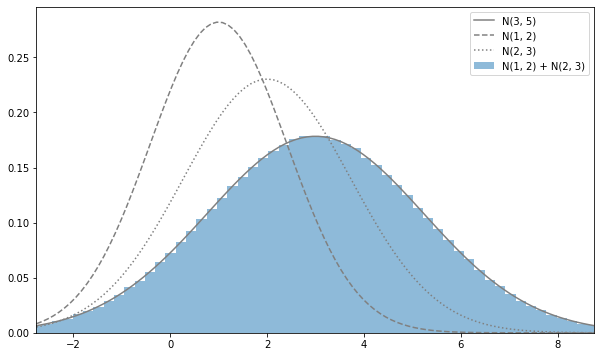

In [9]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True,
        alpha=0.5, label='N(1, 2) + N(2, 3)')
ax.plot(xs, rv.pdf(xs), label='N(3, 5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':', color='gray' )

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

****정규분포의 합의 분포***<br>
서로 독립인 확률변수 $X_1$ ~ $N(\mu_1, \sigma_1^2)$, $X_2$ ~ $N(\mu_2, \sigma_2^2)$, ... $X_n$ ~ $N(\mu_n, \sigma_n^2)$에 관해서<br>
<br>
<center>$\sum_{i=1}^nX_i$ ~ $N(\sum_{i=1}^n\mu_i, \sum_{i=1}^n\sigma_i^2)$</center><br>
<br>
이 성립

### 9.2.2 포아송 분포의 합의 분포

In [10]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(6.999034, 6.989995066843997)

<ipython-input-11-adc3e12cc1c5>:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, _ = np.histogram(sum_sample, bins=20,


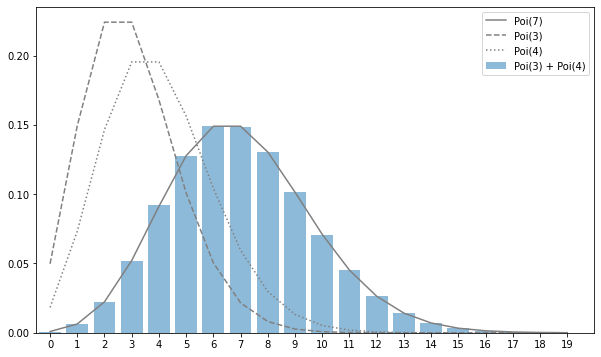

In [11]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist, _ = np.histogram(sum_sample, bins=20,
                       range=(0, 20), normed=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)',  color='gray')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='gray')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':',  color='gray')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

****포아송 분포의 합의 분포***<br>
서로 독립인 확률변수 $X_1$ ~ $Poi(\lambda_1)$, $X_2$ ~ $Poi(\lambda_2)$, ..., $X_n$ ~ $Poi(\lambda_n)$에 관해서<br>
<br>
<center>$\sum_{i=1}^nX_i$ ~ $Poi(\sum_{i=1}^n\lambda_i)$</center><br>
<br>
가 성립

### 9.2.3 베르누이 분포의 합의 분포

In [12]:
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

(2.999494, 2.0946717439639984)

베르누이 분포에는 재생성이 없으며, **베르누이 분포의 합은 이항분포**가 되는 성질이 있다.

<ipython-input-13-59b3b4a15795>:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, _ = np.histogram(sum_sample, bins=10,


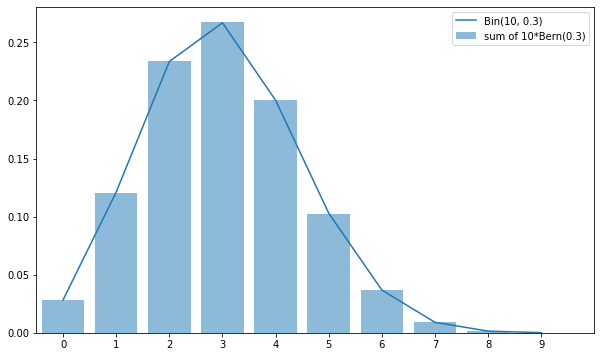

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10,
                       range=(0, 10), normed=True)
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')
ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

****베르누이 분포의 합의 분포***<br>
$X_1, X_2, ..., X_n$ ~ $Bern(p)$에 관해서
<center>$\sum_{i=1}^nX_i$ ~ $Bin(n, p)$</center><br>
<br>
가 성립

## 9.3 표본평균의 분포

****표본평균의 기댓값과 분산***<br>
확률변수 $X_1, X_2, ..., X_n$이 서로 독립이고, 기댓값이 $\mu$, 분산이 $\sigma^2$인 확률분포 $F$를 따를 때<br>
<br>
<center>$E(\bar{X})=\mu$<br>
$V(\bar{X})=\sigma^2/n$</center><br>
<br>
이 성립

### 9.3.1 정규분포의 표본평균 분포

In [14]:
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(0.9995466511402974, 0.19942119653587653)

정규분포의 경우, 표본평균의 $\bar{X}$도 정규분포가 된다.

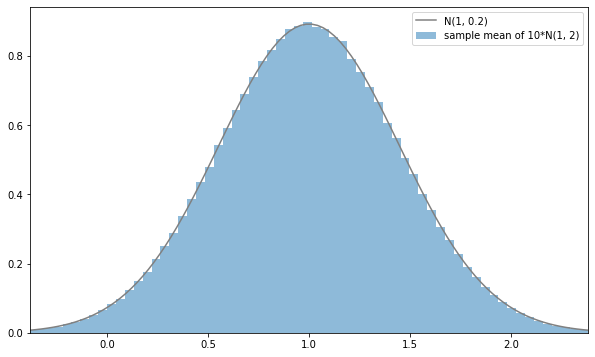

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10*N(1, 2)')
ax.plot(xs, rv_true.pdf(xs), label='N(1, 0.2)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

****정규분포의 표본평균의 분포**<br>
$X_1, X_2, ..., X_n$ ~ $N(\mu, \sigma^2)$이라고 할 때<br>
<br>
<center>$\bar{X}$ ~ $N(\mu, \sigma^2/n)$</center><br>
<br>
이 성립

### 9.3.2 포아송 분포의 표본평균 분포

In [16]:
l = 3
rv = stats.poisson(l)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(2.9991454, 0.30001874965884007)

$\bar{X}$는 이제 포아송 분포를 따르지 않는다.

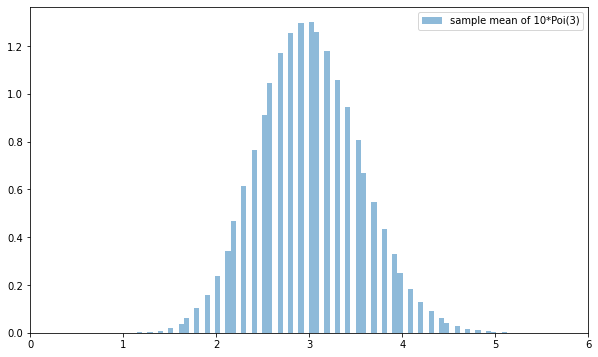

In [17]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10*Poi(3)')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

### 9.3.3 중심극한정리

****중심극한정리***<br>
<br>
확률변수 $X_1, X_2, ..., X_n$이 서로 독립이고, 기댓값이 $\mu$, 분산이 $\sigma^2$인 확률분포 $F$를 따를 때,<br>
$n$이 커짐에 따라 표본평균 $\bar{X}$의 분포는 정규분포 $N(\mu, \sigma^2/n)$에 가까워진다.

In [18]:
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

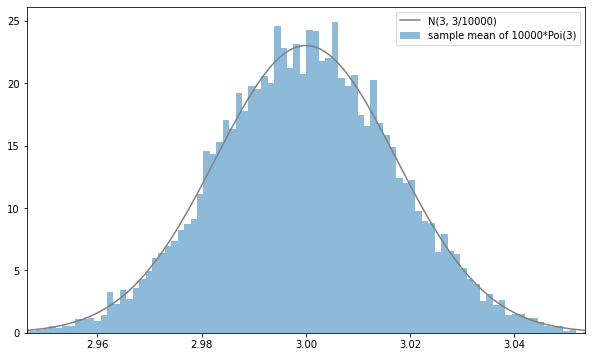

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

### 9.3.4 대수의 법칙

****대수의 법칙***<br>
<br>
확률변수 $X_1, X_2, ... X_n$이 서로 독립이고, 평균이 $\mu$, 분산이 $\sigma^2$일 것 같은 확률분포를 따를 때,<br>
$n$이 커짐에 따라 표본평균은 $\mu$에 수렴한다.

In [20]:
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n, 4))
space = np.linspace(100, n, 50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0)
                      for sp in space]).T

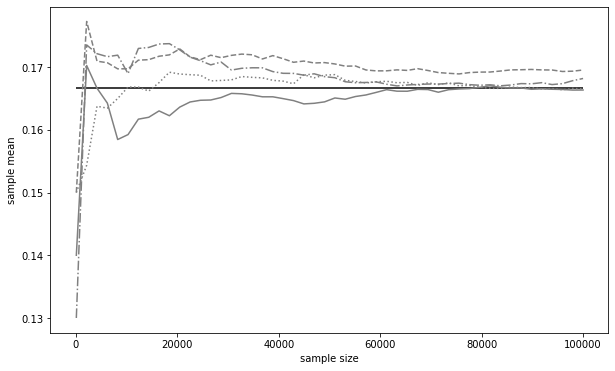

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
ax.hlines(p, -1, n, 'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()